In [1]:
pip install ipython-sql

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install SQLAlchemy

Note: you may need to restart the kernel to use updated packages.


In [3]:
%load_ext sql

In [4]:
%sql sqlite:///attr_data.db

In [5]:
%%sql 

sqlite:///attr_data.db

In [6]:
%%sql
SELECT *
FROM sqlite_master

 * sqlite:///attr_data.db
Done.


type,name,tbl_name,rootpage,sql
table,attrition_records,attrition_records,2,"CREATE TABLE attrition_records ( id INTEGER PRIMARY KEY AUTOINCREMENT, Age INT, Attrition TEXT, BusinessTravel TEXT, DailyRate INT, Department TEXT, DistanceFromHome INT, Education INT, EducationField TEXT, EmployeeCount INT, EmployeeNumber INT, EnvironmentSatisfaction, Gender TEXT, HourlyRate INT, JobInvolvement INT, JobLevel INT, JobRole TEXT, JobSatisfaction INT, MaritalStatus TEXT, MonthlyIncome INT, MonthlyRate INT, NumCompaniesWorked INT, Over18 TEXT, OverTime TEXT, PercentSalaryHike INT, PerformanceRating INT, RelationshipSatisfaction INT, StandardHours INT, StockOptionLevel INT, TotalWorkingYears INT, TrainingTimesLastYear INT, WorkLifeBalance INT, YearsAtCompany INT, YearsInCurrentRole INT, YearsSinceLastPromotion INT, YearsWithCurrManager INT )"
table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"


In [7]:
#Import neccessary libaries.
import sqlite3
import pandas as pd
import sqlalchemy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [8]:
attrition_data = sqlalchemy.create_engine('sqlite:///attr_data.db')

In [9]:
pd.read_sql('attrition_records',attrition_data)

,id,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,...,1,80,0,8,0,1,6,4,0,5
1,2,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,...,4,80,1,10,3,3,10,7,1,7
2,3,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,...,2,80,0,7,3,3,0,0,0,0
3,4,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,...,3,80,0,8,3,3,8,7,3,0
4,5,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,1466,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,...,3,80,1,17,3,3,5,2,0,3
1466,1467,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,...,1,80,1,9,5,3,7,7,1,7
1467,1468,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,...,2,80,1,6,0,3,6,2,0,3
1468,1469,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,...,4,80,0,17,3,2,9,6,0,8


In [10]:
# importing data into pandas dataframe
df_Ibm_data = pd.read_sql('attrition_records',attrition_data)
df_Ibm_data.head()


,id,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,...,1,80,0,8,0,1,6,4,0,5
1,2,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,...,4,80,1,10,3,3,10,7,1,7
2,3,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,...,2,80,0,7,3,3,0,0,0,0
3,4,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,...,3,80,0,8,3,3,8,7,3,0
4,5,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2


In [11]:
# inspecting all columns and structure of dataframe
pd.options.display.max_columns = 36
df_Ibm_data.sample(10).transpose()

,334,399,176,125,965,896,1346,138,1077,920
id,335,400,177,126,966,897,1347,139,1078,921
Age,45,31,33,26,25,31,45,25,29,34
Attrition,No,No,No,No,No,No,No,No,Yes,No
BusinessTravel,Travel_Rarely,Travel_Rarely,Travel_Rarely,Travel_Rarely,Travel_Rarely,Travel_Rarely,Travel_Rarely,Travel_Rarely,Travel_Rarely,Travel_Frequently
DailyRate,549,329,134,841,882,1062,556,959,224,135
Department,Research & Development,Research & Development,Research & Development,Research & Development,Research & Development,Research & Development,Research & Development,Sales,Research & Development,Research & Development
DistanceFromHome,8,1,2,6,19,24,25,28,1,19
Education,4,2,3,3,1,3,2,3,4,3
EducationField,Other,Life Sciences,Life Sciences,Other,Medical,Medical,Life Sciences,Life Sciences,Technical Degree,Medical
EmployeeCount,1,1,1,1,1,1,1,1,1,1


In [12]:
# columns in dataset
df_Ibm_data.columns

Index(['id', 'Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [13]:
# check for NaN Values
df_Ibm_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   id                        1470 non-null   int64 
 1   Age                       1470 non-null   int64 
 2   Attrition                 1470 non-null   object
 3   BusinessTravel            1470 non-null   object
 4   DailyRate                 1470 non-null   int64 
 5   Department                1470 non-null   object
 6   DistanceFromHome          1470 non-null   int64 
 7   Education                 1470 non-null   int64 
 8   EducationField            1470 non-null   object
 9   EmployeeCount             1470 non-null   int64 
 10  EmployeeNumber            1470 non-null   int64 
 11  EnvironmentSatisfaction   1470 non-null   int64 
 12  Gender                    1470 non-null   object
 13  HourlyRate                1470 non-null   int64 
 14  JobInvolvement          

In [14]:
# count of dataset
df_Ibm_data.shape

(1470, 36)

### insights
The Attrition dataset had 1470 observations with 36 variables.

# checking for unique values

In [15]:
for column in df_Ibm_data.columns:
    if df_Ibm_data[column].dtype == object:
        print("{}:{}".format(column,df_Ibm_data[column].unique()))

Attrition:['Yes' 'No']
BusinessTravel:['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Department:['Sales' 'Research & Development' 'Human Resources']
EducationField:['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Gender:['Female' 'Male']
JobRole:['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
MaritalStatus:['Single' 'Married' 'Divorced']
Over18:['Y']
OverTime:['Yes' 'No']


In [16]:
for column in df_Ibm_data.columns:
    print("{}:{}".format(column,df_Ibm_data[column].nunique()))

id:1470
Age:43
Attrition:2
BusinessTravel:3
DailyRate:886
Department:3
DistanceFromHome:29
Education:5
EducationField:6
EmployeeCount:1
EmployeeNumber:1470
EnvironmentSatisfaction:4
Gender:2
HourlyRate:71
JobInvolvement:4
JobLevel:5
JobRole:9
JobSatisfaction:4
MaritalStatus:3
MonthlyIncome:1349
MonthlyRate:1427
NumCompaniesWorked:10
Over18:1
OverTime:2
PercentSalaryHike:15
PerformanceRating:2
RelationshipSatisfaction:4
StandardHours:1
StockOptionLevel:4
TotalWorkingYears:40
TrainingTimesLastYear:7
WorkLifeBalance:4
YearsAtCompany:37
YearsInCurrentRole:19
YearsSinceLastPromotion:16
YearsWithCurrManager:18


# checking for maximum and minimum values in objects and non-object columns

In [17]:
for column in df_Ibm_data.columns:
    print("{}:{}:{}".format(column,df_Ibm_data[column].min(),df_Ibm_data[column].max()))

# for column in df_Ibm_data.columns:
#     if df_Ibm_data[column].dtype != object:
#         print("{}:{}:{}".format(column,df_Ibm_data[column].min(),df_Ibm_data[column].max()))

id:1:1470
Age:18:60
Attrition:No:Yes
BusinessTravel:Non-Travel:Travel_Rarely
DailyRate:102:1499
Department:Human Resources:Sales
DistanceFromHome:1:29
Education:1:5
EducationField:Human Resources:Technical Degree
EmployeeCount:1:1
EmployeeNumber:1:2068
EnvironmentSatisfaction:1:4
Gender:Female:Male
HourlyRate:30:100
JobInvolvement:1:4
JobLevel:1:5
JobRole:Healthcare Representative:Sales Representative
JobSatisfaction:1:4
MaritalStatus:Divorced:Single
MonthlyIncome:1009:19999
MonthlyRate:2094:26999
NumCompaniesWorked:0:9
Over18:Y:Y
OverTime:No:Yes
PercentSalaryHike:11:25
PerformanceRating:3:4
RelationshipSatisfaction:1:4
StandardHours:80:80
StockOptionLevel:0:3
TotalWorkingYears:0:40
TrainingTimesLastYear:0:6
WorkLifeBalance:1:4
YearsAtCompany:0:40
YearsInCurrentRole:0:18
YearsSinceLastPromotion:0:15
YearsWithCurrManager:0:17


In [18]:
# Data description for all numeric fields
df_Ibm_data.describe()

,id,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,735.500000,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,424.496761,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,1.000000,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,368.250000,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,735.500000,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1102.750000,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,1470.000000,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [19]:
# #dropping some columns that might not have influence to employees attrition
# columns = ["id","EmployeeCount", "EmployeeNumber", "Over18", "StandardHours"]
# df_Ibm_data.drop(columns, inplace = True, axis=1)
# df_Ibm_data.columns

## ATTRITION

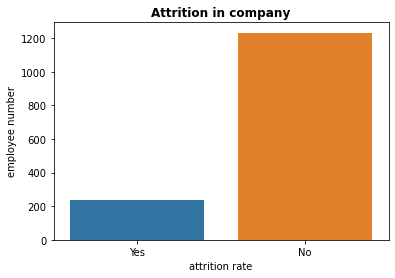

In [20]:
# bar plot of attrition
# bar plot of attrition
plt.title('Attrition in company', fontweight="bold")
sns.countplot("Attrition", data=df_Ibm_data)
plt.xlabel("attrition rate")
plt.ylabel("employee number");


In [21]:
df_Ibm_data.Attrition.value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [22]:
#calculate the percentage of performance rating per category in the whole dataset
round(df_Ibm_data['Attrition'].value_counts()/df_Ibm_data.shape[0] * 100,2)

No     83.88
Yes    16.12
Name: Attrition, dtype: float64

## insights;
Attrition column contains possible outcomes; Yes and No.
The graph below shows the distribution of the target variable. Out of the total of 1470 observations, 1233 is No whereas 237 is Yes which comprises of the 16% of the total number of employee that left the company for some reasons. thus this makes the attrition rate somewhat imbalance.  

# numerical and categorical columns analysis

In [23]:
numerical_col = [(df_Ibm_data.select_dtypes(include = np.number).columns)]
categorical_col = [(df_Ibm_data.select_dtypes(include = object).columns)]

In [24]:
numerical_col

[Index(['id', 'Age', 'DailyRate', 'DistanceFromHome', 'Education',
        'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction',
        'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction',
        'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
        'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
        'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
        'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
        'YearsInCurrentRole', 'YearsSinceLastPromotion',
        'YearsWithCurrManager'],
       dtype='object')]

In [25]:
categorical_col

[Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
        'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
       dtype='object')]

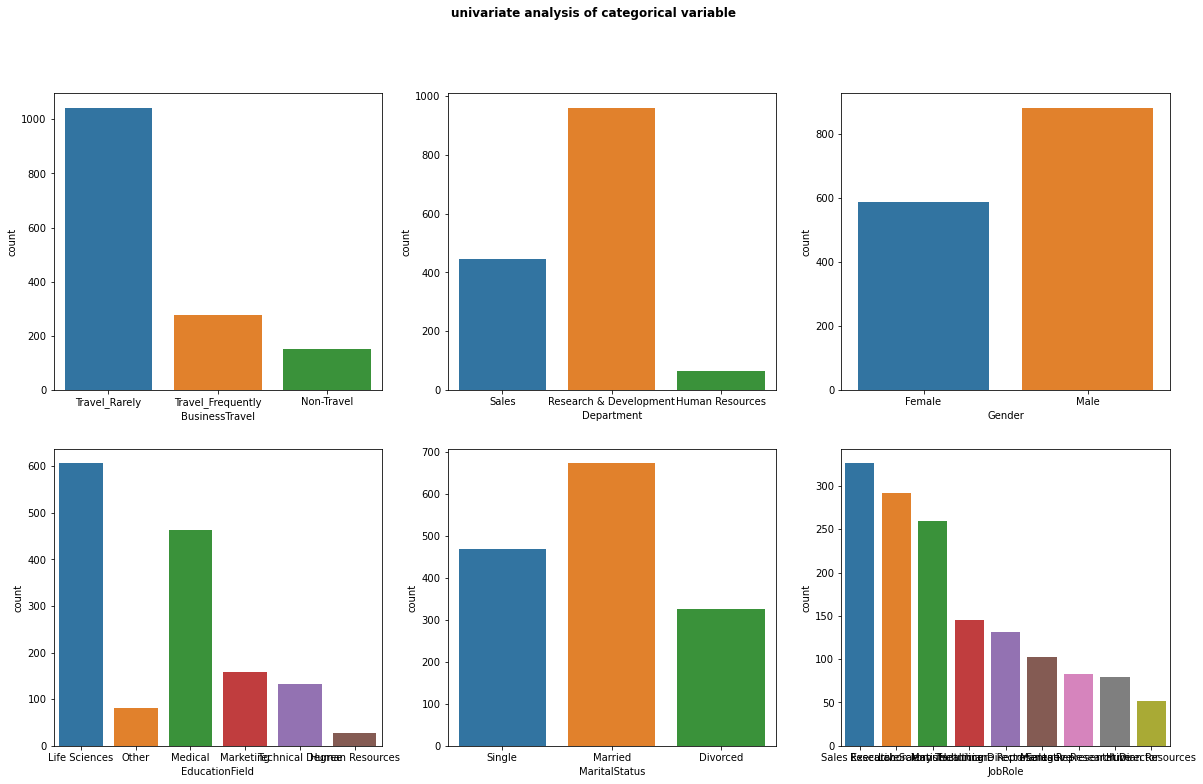

In [26]:
# frequency distribution of all categorical variables.
fig, axes = plt.subplots(2,3, figsize=(20,12))
plt.suptitle('univariate analysis of categorical variable', fontweight="bold")
sns.countplot("BusinessTravel", data=df_Ibm_data, ax=axes[0,0])
sns.countplot("Department", data=df_Ibm_data, ax=axes[0,1])
sns.countplot("Gender", data=df_Ibm_data, ax=axes[0,2])
sns.countplot("EducationField", data=df_Ibm_data, ax=axes[1,0])
sns.countplot("MaritalStatus", data=df_Ibm_data, ax=axes[1,1])
sns.countplot("JobRole", data=df_Ibm_data, ax=axes[1,2]);

insights

1) most of the employees rarely travel, about 1/4th of the employees travel frequently.
2) most of the employees are in research & development field.
3) the ratio of male to female is not bad using gender equality of women participation to labour force.
4) most of the married employees do not do overtime but more than half of the single employees do overtime since they are not married.

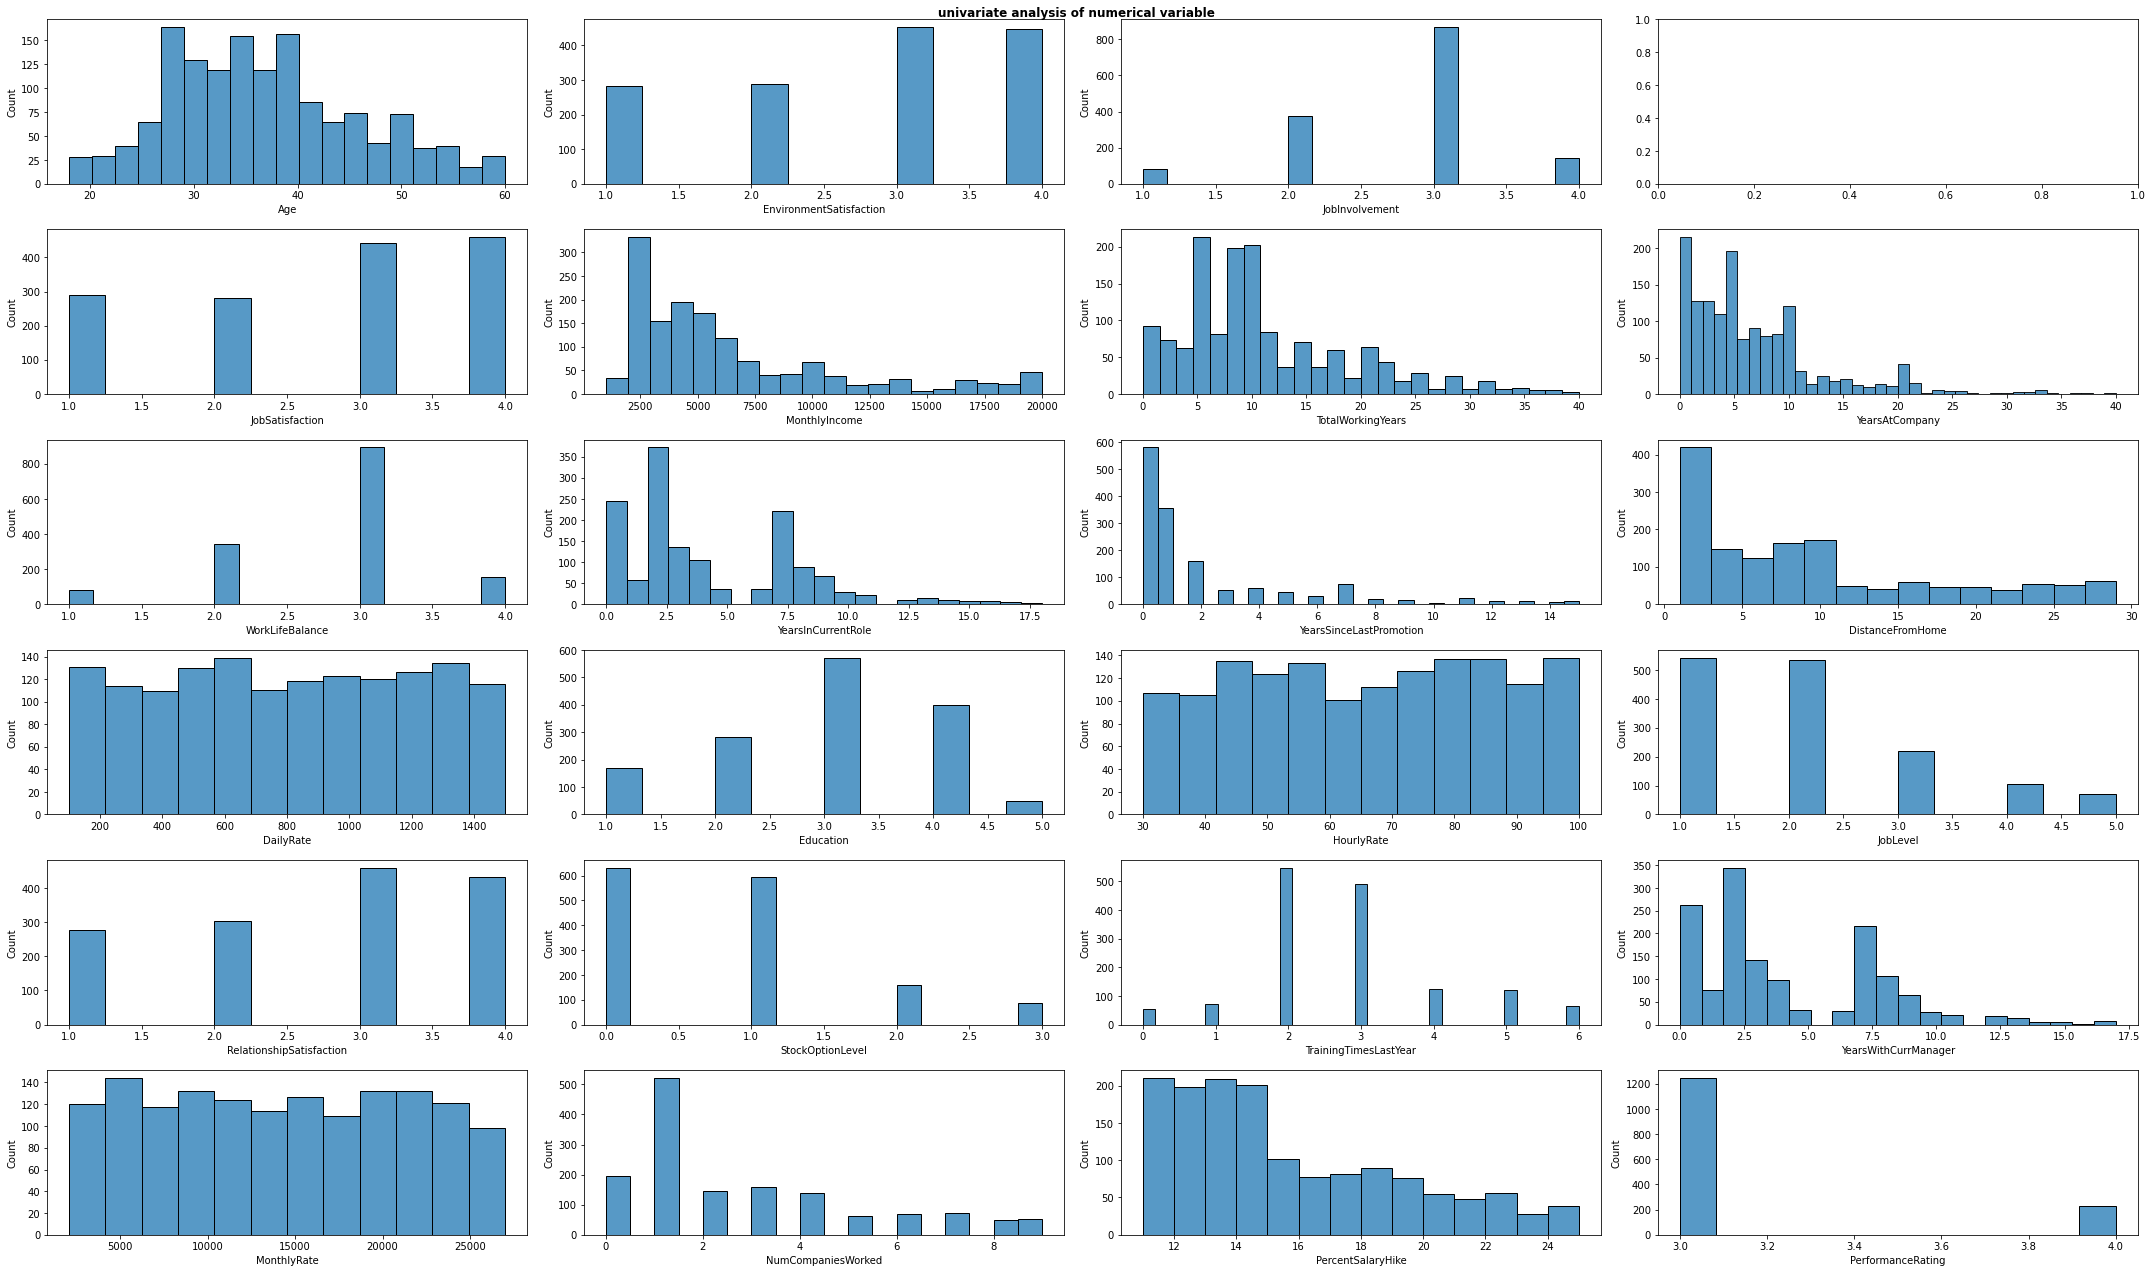

In [27]:
fig,ax = plt.subplots(6,4, figsize=(30,18))
plt.suptitle('univariate analysis of numerical variable', fontweight="bold")
sns.histplot(df_Ibm_data['TotalWorkingYears'], ax =ax[1,2])
sns.histplot(df_Ibm_data['MonthlyIncome'], ax =ax[1,1])
sns.histplot(df_Ibm_data['YearsAtCompany'], ax =ax[1,3])
sns.histplot(df_Ibm_data['DistanceFromHome'], ax =ax[2,3])
sns.histplot(df_Ibm_data['YearsInCurrentRole'], ax =ax[2,1])
sns.histplot(df_Ibm_data['YearsSinceLastPromotion'], ax =ax[2,2])
sns.histplot(df_Ibm_data['WorkLifeBalance'], ax =ax[2,0])
sns.histplot(df_Ibm_data['JobSatisfaction'], ax =ax[1,0])
sns.histplot(df_Ibm_data['Age'], ax =ax[0,0])
sns.histplot(df_Ibm_data['EnvironmentSatisfaction'], ax =ax[0,1])
sns.histplot(df_Ibm_data['JobInvolvement'], ax =ax[0,2])
sns.histplot(df_Ibm_data['DailyRate'], ax =ax[3,0])
sns.histplot(df_Ibm_data['Education'], ax =ax[3,1])
sns.histplot(df_Ibm_data['HourlyRate'], ax =ax[3,2])
sns.histplot(df_Ibm_data['JobLevel'], ax =ax[3,3])
sns.histplot(df_Ibm_data['RelationshipSatisfaction'], ax =ax[4,0])
sns.histplot(df_Ibm_data['StockOptionLevel'], ax =ax[4,1])
sns.histplot(df_Ibm_data['TrainingTimesLastYear'], ax =ax[4,2])
sns.histplot(df_Ibm_data['YearsWithCurrManager'], ax =ax[4,3])
sns.histplot(df_Ibm_data['MonthlyRate'], ax =ax[5,0])
sns.histplot(df_Ibm_data['NumCompaniesWorked'], ax =ax[5,1])
sns.histplot(df_Ibm_data['PercentSalaryHike'], ax =ax[5,2])
sns.histplot(df_Ibm_data['PerformanceRating'], ax =ax[5,3])
plt.tight_layout();

# Analyzing each of the columns

# Age

In [28]:
df_Ibm_data.Age.value_counts()

35    78
34    77
36    69
31    69
29    68
32    61
30    60
38    58
33    58
40    57
37    50
27    48
28    48
42    46
39    42
45    41
41    40
26    39
44    33
46    33
43    32
50    30
24    26
25    26
47    24
49    24
55    22
53    19
48    19
51    19
52    18
54    18
22    16
56    14
23    14
58    14
21    13
20    11
59    10
19     9
18     8
60     5
57     4
Name: Age, dtype: int64

In [29]:
round(df_Ibm_data.Age.value_counts()/df_Ibm_data.shape[0] * 100,2 )

35    5.31
34    5.24
36    4.69
31    4.69
29    4.63
32    4.15
30    4.08
38    3.95
33    3.95
40    3.88
37    3.40
27    3.27
28    3.27
42    3.13
39    2.86
45    2.79
41    2.72
26    2.65
44    2.24
46    2.24
43    2.18
50    2.04
24    1.77
25    1.77
47    1.63
49    1.63
55    1.50
53    1.29
48    1.29
51    1.29
52    1.22
54    1.22
22    1.09
56    0.95
23    0.95
58    0.95
21    0.88
20    0.75
59    0.68
19    0.61
18    0.54
60    0.34
57    0.27
Name: Age, dtype: float64

Age  Attrition
18   No            4
     Yes           4
19   Yes           6
     No            3
20   Yes           6
                  ..
57   No            4
58   No            9
     Yes           5
59   No           10
60   No            5
Name: Attrition, Length: 82, dtype: int64


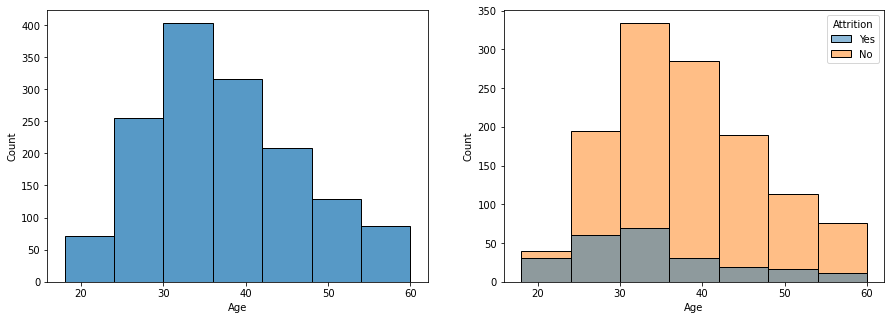

In [30]:
# impact of age to the overall attrition rate
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5))
ax = sns.histplot(x= "Age", data=df_Ibm_data, bins = 7, ax=ax1)
ax = sns.histplot(x= "Age", hue = "Attrition", data=df_Ibm_data, bins = 7, ax=ax2)
Age = df_Ibm_data.groupby("Age")["Attrition"]
print(Age.value_counts())

### insights:
young employees tend to leave the company more. evaluating the overall attrition in the company, ages 25-35 had the highes attrition number comparing to other ages while ages between 35-60 prefer to stay in the company

# Gender

In [31]:
df_Ibm_data.Gender.value_counts()

Male      882
Female    588
Name: Gender, dtype: int64

In [32]:
round(df_Ibm_data.Gender.value_counts()/df_Ibm_data.shape[0] * 100,2 )

Male      60.0
Female    40.0
Name: Gender, dtype: float64

Gender  Attrition
Female  No           501
        Yes           87
Male    No           732
        Yes          150
Name: Attrition, dtype: int64


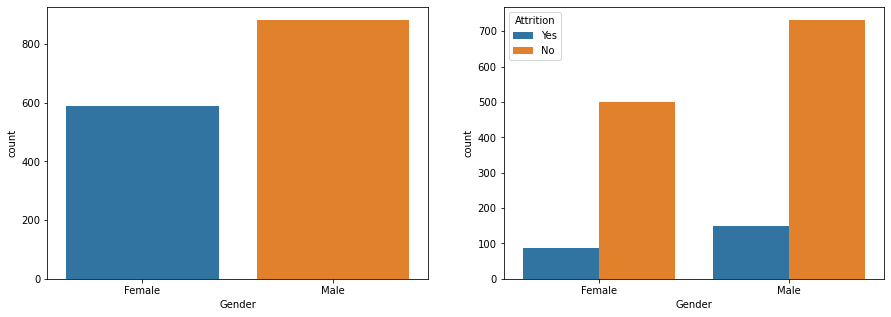

In [33]:
# impact of Gender to the overall attrition rate
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5))
ax = sns.countplot(x= "Gender", data=df_Ibm_data, ax=ax1)
ax = sns.countplot(x= "Gender", hue = "Attrition", data=df_Ibm_data, ax=ax2)
Gender = df_Ibm_data.groupby("Gender")["Attrition"]
print(Gender.value_counts())

### insights;

from the plot above, it can be deduced that male tends to be at higher attrition risk than females 

# Department

In [34]:
df_Ibm_data.Department.value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

In [35]:
round(df_Ibm_data.Department.value_counts()/df_Ibm_data.shape[0] * 100,2 )


Research & Development    65.37
Sales                     30.34
Human Resources            4.29
Name: Department, dtype: float64

Department              Attrition
Human Resources         No            51
                        Yes           12
Research & Development  No           828
                        Yes          133
Sales                   No           354
                        Yes           92
Name: Attrition, dtype: int64


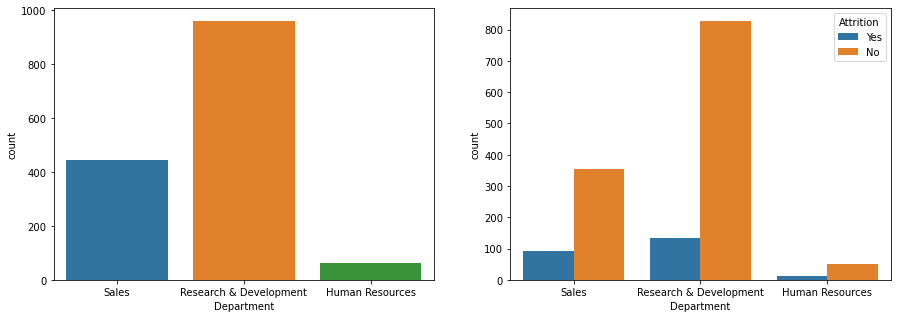

In [36]:
# impact of Department to the overall attrition rate
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5))
ax = sns.countplot(x= "Department", data=df_Ibm_data, ax=ax1)
ax = sns.countplot(x= "Department", hue = "Attrition", data=df_Ibm_data, ax=ax2)
Department = df_Ibm_data.groupby("Department")["Attrition"]
print(Department.value_counts())

### insight;
There are three(3) departments in the company which are;
1)Research and development: this department has the most attrition number where about 133 employees left th company.
2)Sales: it has been mostly affected by atrition where about 92 employees left
3)Human Resources: it has been most affected by attrition itself.



# Monthly income

In [37]:
df_Ibm_data.MonthlyIncome.value_counts()

2342     4
6142     3
2610     3
2559     3
6347     3
        ..
4103     1
2705     1
6796     1
19717    1
10239    1
Name: MonthlyIncome, Length: 1349, dtype: int64

In [38]:
round(df_Ibm_data.MonthlyIncome.value_counts()/df_Ibm_data.shape[0] * 100,2 )

2342     0.27
6142     0.20
2610     0.20
2559     0.20
6347     0.20
         ... 
4103     0.07
2705     0.07
6796     0.07
19717    0.07
10239    0.07
Name: MonthlyIncome, Length: 1349, dtype: float64

MonthlyIncome  Attrition
1009           Yes          1
1051           No           1
1052           No           1
1081           Yes          1
1091           Yes          1
                           ..
19859          Yes          1
19926          No           1
19943          No           1
19973          No           1
19999          No           1
Name: Attrition, Length: 1388, dtype: int64


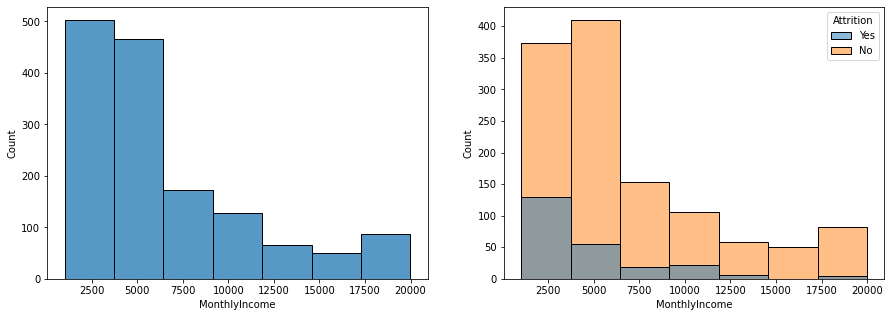

In [39]:
# impact of MonthlyIncome to the overall attrition rate
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5))
ax = sns.histplot(x= "MonthlyIncome", data=df_Ibm_data, bins = 7, ax=ax1)
ax = sns.histplot(x= "MonthlyIncome", hue = "Attrition", data=df_Ibm_data, bins = 7, ax=ax2)
MonthlyIncome = df_Ibm_data.groupby("MonthlyIncome")["Attrition"]
print(MonthlyIncome.value_counts())

### insights:

from the of monthly income it can be seen that people with low monthly income have a higher probability of attrition especially when the monthly income is very low. from the plot it is seen that those with Monthly income greater than 5000 employees tends not leave the company

# Job level

In [40]:
df_Ibm_data.JobLevel.value_counts()

1    543
2    534
3    218
4    106
5     69
Name: JobLevel, dtype: int64

In [41]:
round(df_Ibm_data.JobLevel.value_counts()/df_Ibm_data.shape[0] * 100,2 )

1    36.94
2    36.33
3    14.83
4     7.21
5     4.69
Name: JobLevel, dtype: float64

JobLevel  Attrition
1         No           400
          Yes          143
2         No           482
          Yes           52
3         No           186
          Yes           32
4         No           101
          Yes            5
5         No            64
          Yes            5
Name: Attrition, dtype: int64


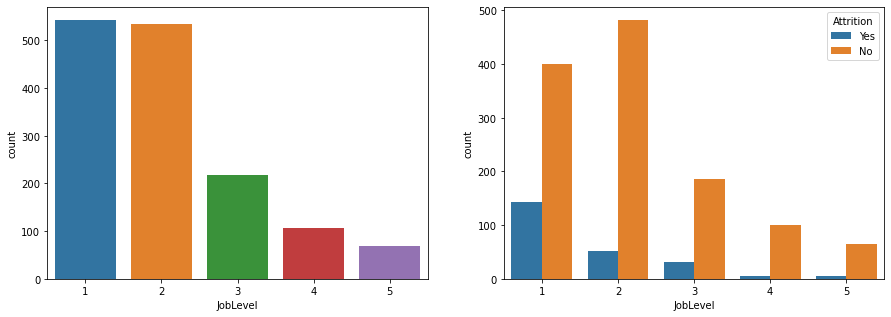

In [42]:
# impact of JobLevel to the overall attrition rate
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5))
ax = sns.countplot(x= "JobLevel", data=df_Ibm_data, ax=ax1)
ax = sns.countplot(x= "JobLevel", hue = "Attrition", data=df_Ibm_data, ax=ax2)
JobLevel = df_Ibm_data.groupby("JobLevel")["Attrition"]
print(JobLevel.value_counts())

### insights;
it can be deduced from the plot that as job level increases, the number of people leaving the company tends to decrease.
taking if 1 is for entry-level role, Attrition is highest at that stage and 5 as the highest level role.

# Job satisfaction

In [43]:
df_Ibm_data.JobSatisfaction.value_counts()

4    459
3    442
1    289
2    280
Name: JobSatisfaction, dtype: int64

In [44]:
round(df_Ibm_data.JobSatisfaction.value_counts()/df_Ibm_data.shape[0] * 100,2 )

4    31.22
3    30.07
1    19.66
2    19.05
Name: JobSatisfaction, dtype: float64

JobSatisfaction  Attrition
1                No           223
                 Yes           66
2                No           234
                 Yes           46
3                No           369
                 Yes           73
4                No           407
                 Yes           52
Name: Attrition, dtype: int64


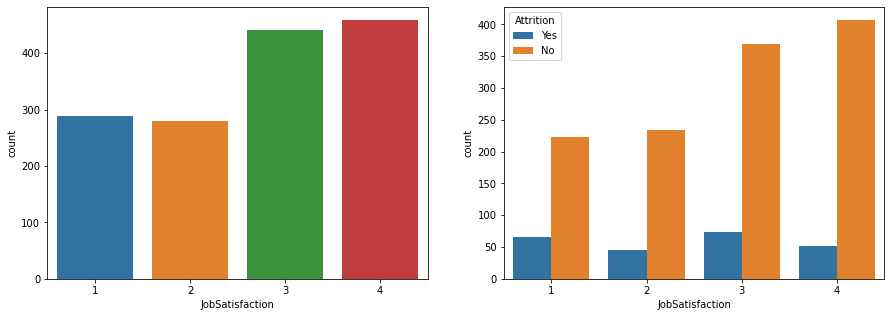

In [45]:
# impact of JobSatisfaction to the overall attrition rate
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5))
ax = sns.countplot(x= "JobSatisfaction", data=df_Ibm_data, ax=ax1)
ax = sns.countplot(x= "JobSatisfaction", hue = "Attrition", data=df_Ibm_data, ax=ax2)
JobSatisfaction = df_Ibm_data.groupby("JobSatisfaction")["Attrition"]
print(JobSatisfaction.value_counts())

### insights;
surprisingly, in high job satisfaction(1), employees tend to leave the company although job satisfaction should not be a reason for attrition.
aside other groups of job satisfaction low(4) job satisfaction employees leave the company as it may habe been expected.

# Job Role

In [46]:
df_Ibm_data.JobRole.value_counts()

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

In [47]:
round(df_Ibm_data.JobRole.value_counts()/df_Ibm_data.shape[0] * 100,2 )

Sales Executive              22.18
Research Scientist           19.86
Laboratory Technician        17.62
Manufacturing Director        9.86
Healthcare Representative     8.91
Manager                       6.94
Sales Representative          5.65
Research Director             5.44
Human Resources               3.54
Name: JobRole, dtype: float64

JobRole                    Attrition
Healthcare Representative  No           122
                           Yes            9
Human Resources            No            40
                           Yes           12
Laboratory Technician      No           197
                           Yes           62
Manager                    No            97
                           Yes            5
Manufacturing Director     No           135
                           Yes           10
Research Director          No            78
                           Yes            2
Research Scientist         No           245
                           Yes           47
Sales Executive            No           269
                           Yes           57
Sales Representative       No            50
                           Yes           33
Name: Attrition, dtype: int64


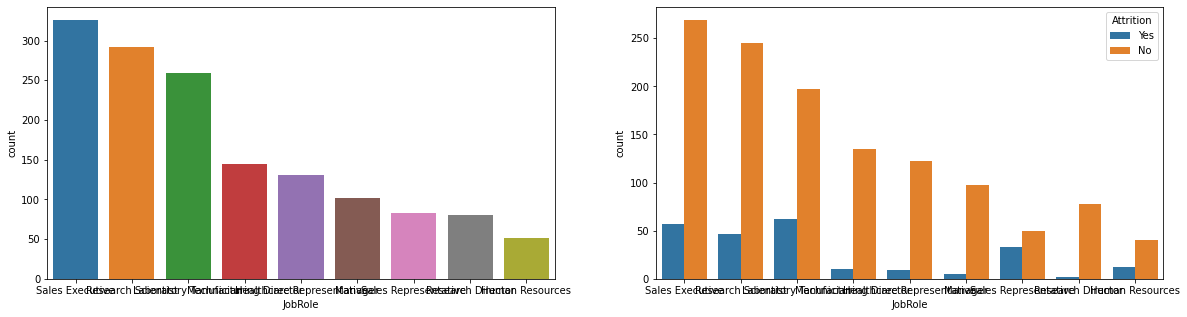

In [48]:
# impact of JobRole to the overall attrition rate
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,5))
ax = sns.countplot(x= "JobRole", data=df_Ibm_data, ax=ax1)
ax = sns.countplot(x= "JobRole", hue = "Attrition", data=df_Ibm_data, ax=ax2)
JobRole = df_Ibm_data.groupby("JobRole")["Attrition"]
print(JobRole.value_counts())

### insights;
Laboratory technician has the highest attrition number, followed by Sales Executive and Research Scientist with attrition of 57 and 47 employees respectively.

sales respresentative role has been most affected by attrition within the job role, followed by laboratory technician and human resources.

research director has the lowest attrition of just 2 employees within its job role.

# Job involvement

In [49]:
df_Ibm_data.JobInvolvement.value_counts()

3    868
2    375
4    144
1     83
Name: JobInvolvement, dtype: int64

In [50]:
round(df_Ibm_data.JobInvolvement.value_counts()/df_Ibm_data.shape[0] * 100,2 )

3    59.05
2    25.51
4     9.80
1     5.65
Name: JobInvolvement, dtype: float64

JobInvolvement  Attrition
1               No            55
                Yes           28
2               No           304
                Yes           71
3               No           743
                Yes          125
4               No           131
                Yes           13
Name: Attrition, dtype: int64


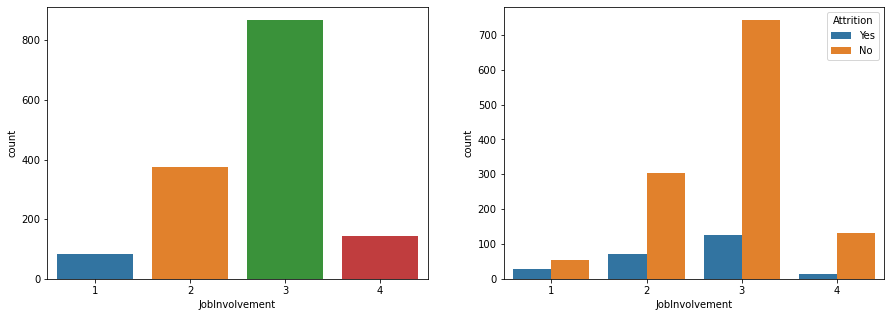

In [51]:
# impact of JobInvolvement to the overall attrition rate
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5))
ax = sns.countplot(x= "JobInvolvement", data=df_Ibm_data, ax=ax1)
ax = sns.countplot(x= "JobInvolvement", hue = "Attrition", data=df_Ibm_data, ax=ax2)
JobInvolvement = df_Ibm_data.groupby("JobInvolvement")["Attrition"]
print(JobInvolvement.value_counts())

### insights;
category 3(medium) has the highest attrition followed by low(2) 

# Environment Satisfaction

In [52]:
df_Ibm_data.EnvironmentSatisfaction.value_counts()

3    453
4    446
2    287
1    284
Name: EnvironmentSatisfaction, dtype: int64

In [53]:
round(df_Ibm_data.EnvironmentSatisfaction.value_counts()/df_Ibm_data.shape[0] * 100,2 )

3    30.82
4    30.34
2    19.52
1    19.32
Name: EnvironmentSatisfaction, dtype: float64

EnvironmentSatisfaction  Attrition
1                        No           212
                         Yes           72
2                        No           244
                         Yes           43
3                        No           391
                         Yes           62
4                        No           386
                         Yes           60
Name: Attrition, dtype: int64


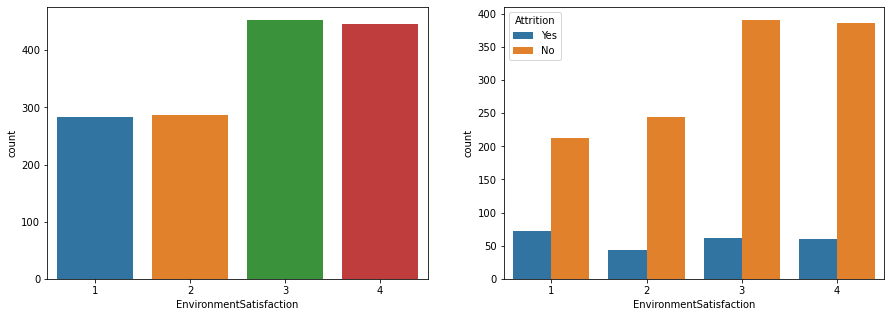

In [54]:
# impact of EnvironmentSatisfaction to the overall attrition rate
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5))
ax = sns.countplot(x= "EnvironmentSatisfaction", data=df_Ibm_data, ax=ax1)
ax = sns.countplot(x= "EnvironmentSatisfaction", hue = "Attrition", data=df_Ibm_data, ax=ax2)
EnvironmentSatisfaction = df_Ibm_data.groupby("EnvironmentSatisfaction")["Attrition"]
print(EnvironmentSatisfaction.value_counts())

### insights;
it can be deduced that environment satisfaction is not a factor to atttition since in high and very high(1 and 4 resp.) employees still leave the company although as expected from low environment satisfaction attrition is highest.

# Job Involvement 

In [55]:
df_Ibm_data.JobInvolvement.value_counts()

3    868
2    375
4    144
1     83
Name: JobInvolvement, dtype: int64

In [56]:
round(df_Ibm_data.JobInvolvement.value_counts()/df_Ibm_data.shape[0] * 100,2 )

3    59.05
2    25.51
4     9.80
1     5.65
Name: JobInvolvement, dtype: float64

JobInvolvement  Attrition
1               No            55
                Yes           28
2               No           304
                Yes           71
3               No           743
                Yes          125
4               No           131
                Yes           13
Name: Attrition, dtype: int64


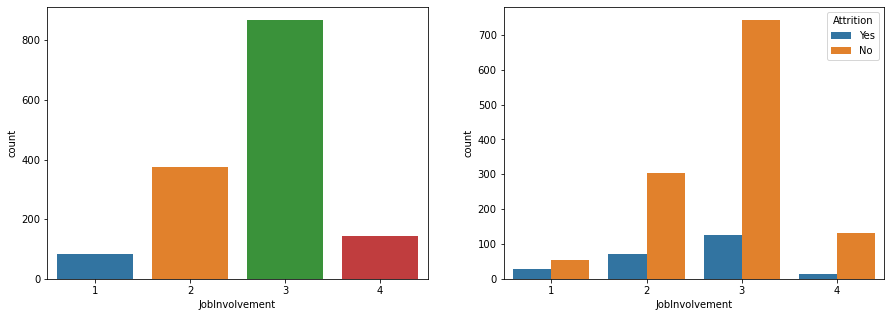

In [57]:
# impact of EnvironmentSatisfaction to the overall attrition rate
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5))
ax = sns.countplot(x= "JobInvolvement", data=df_Ibm_data, ax=ax1)
ax = sns.countplot(x= "JobInvolvement", hue = "Attrition", data=df_Ibm_data, ax=ax2)
JobInvolvement = df_Ibm_data.groupby("JobInvolvement")["Attrition"]
print(JobInvolvement.value_counts())

### insights;
it can be deduced that those leave the company are those in medium category(3) and low job involvement(2)

# WorkLife Balance


In [58]:
df_Ibm_data.WorkLifeBalance.value_counts()

3    893
2    344
4    153
1     80
Name: WorkLifeBalance, dtype: int64

In [59]:
round(df_Ibm_data.WorkLifeBalance.value_counts()/df_Ibm_data.shape[0] * 100,2 )

3    60.75
2    23.40
4    10.41
1     5.44
Name: WorkLifeBalance, dtype: float64

WorkLifeBalance  Attrition
1                No            55
                 Yes           25
2                No           286
                 Yes           58
3                No           766
                 Yes          127
4                No           126
                 Yes           27
Name: Attrition, dtype: int64


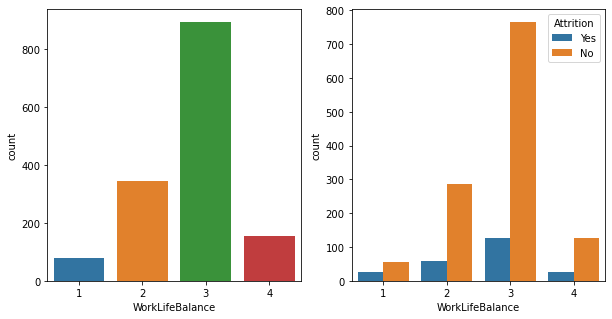

In [60]:
# impact of work-life balance to the overall attrition rate
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
ax = sns.countplot(x= "WorkLifeBalance", data=df_Ibm_data, ax=ax1)
ax = sns.countplot(x= "WorkLifeBalance", hue = "Attrition", data=df_Ibm_data, ax=ax2)
WorkLifeBalance = df_Ibm_data.groupby("WorkLifeBalance")["Attrition"]
print(WorkLifeBalance.value_counts())

insights
1) most employees have above average(60.75%)work life balance(3)  while very few employees(5%) practice poor work life balance(1).
2) from the plot we can deduce that most employees with good work life balance(3,2,4) do not leave the company while those in 1(probably the entry-level role)work life balance tends to leave the company

# Business Travel

In [61]:
df_Ibm_data.BusinessTravel.value_counts()

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

In [62]:
round(df_Ibm_data.BusinessTravel.value_counts()/df_Ibm_data.shape[0] * 100,2 )

Travel_Rarely        70.95
Travel_Frequently    18.84
Non-Travel           10.20
Name: BusinessTravel, dtype: float64

BusinessTravel     Attrition
Non-Travel         No           138
                   Yes           12
Travel_Frequently  No           208
                   Yes           69
Travel_Rarely      No           887
                   Yes          156
Name: Attrition, dtype: int64


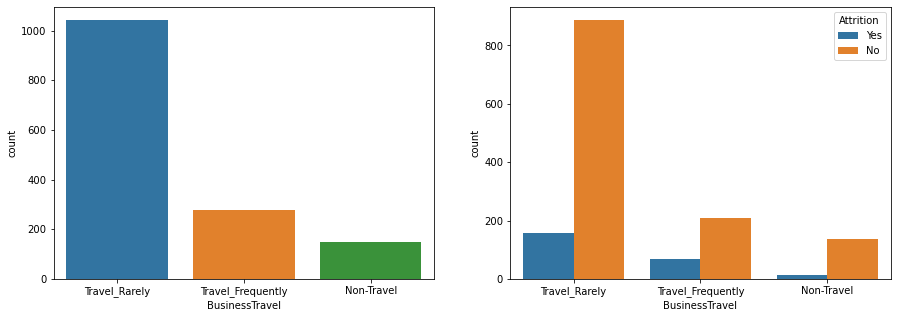

In [63]:
# impact of BusinessTravel to the overall attrition rate
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5))
ax = sns.countplot(x= "BusinessTravel", data=df_Ibm_data, ax=ax1)
ax = sns.countplot(x= "BusinessTravel", hue = "Attrition", data=df_Ibm_data, ax=ax2)
BusinessTravel = df_Ibm_data.groupby("BusinessTravel")["Attrition"]
print(BusinessTravel.value_counts())

### insights;
it can be deduced that employees that rarely travels has the highest attrition and tend to retire or resign from the company likewise for those who that travels frequently while those that do not travel have the lowest attrition rate

# Education

In [64]:
df_Ibm_data.Education.value_counts()

3    572
4    398
2    282
1    170
5     48
Name: Education, dtype: int64

In [65]:
round(df_Ibm_data.Education.value_counts()/df_Ibm_data.shape[0] * 100,2 )

3    38.91
4    27.07
2    19.18
1    11.56
5     3.27
Name: Education, dtype: float64

Education  Attrition
1          No           139
           Yes           31
2          No           238
           Yes           44
3          No           473
           Yes           99
4          No           340
           Yes           58
5          No            43
           Yes            5
Name: Attrition, dtype: int64


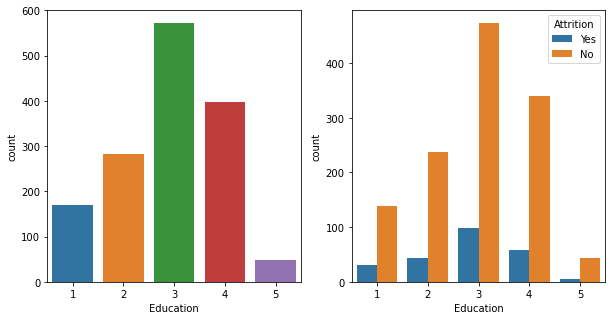

In [66]:
# impact of Education to the overall attrition rate
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
ax = sns.countplot(x= "Education", data=df_Ibm_data, ax=ax1)
ax = sns.countplot(x= "Education", hue = "Attrition", data=df_Ibm_data, ax=ax2)
Education = df_Ibm_data.groupby("Education")["Attrition"]
print(Education.value_counts())

### insights;
about 100 employees in (3) resigned or retired from the company this could be a factor that affects attrition

# Daily Rate

In [67]:
df_Ibm_data.DailyRate.value_counts()

691     6
1082    5
408     5
329     5
530     5
       ..
708     1
713     1
717     1
719     1
1499    1
Name: DailyRate, Length: 886, dtype: int64

In [68]:
round(df_Ibm_data.DailyRate.value_counts()/df_Ibm_data.shape[0] * 100,2 )

691     0.41
1082    0.34
408     0.34
329     0.34
530     0.34
        ... 
708     0.07
713     0.07
717     0.07
719     0.07
1499    0.07
Name: DailyRate, Length: 886, dtype: float64

DailyRate  Attrition
102        No           1
103        Yes          1
104        Yes          1
105        No           1
106        No           1
                       ..
1495       No           3
1496       No           1
           Yes          1
1498       No           1
1499       No           1
Name: Attrition, Length: 1021, dtype: int64


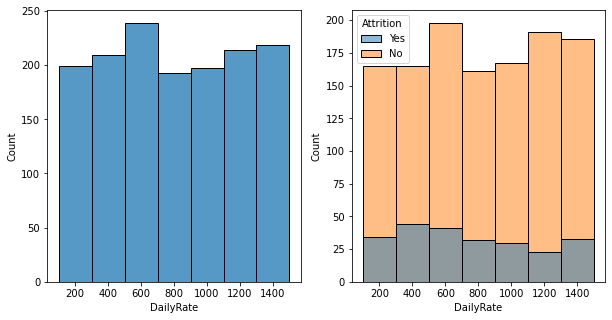

In [69]:
# impact of work-life balance to the overall attrition rate
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
ax = sns.histplot(x= "DailyRate", data=df_Ibm_data, bins= 7,ax=ax1)
ax = sns.histplot(x= "DailyRate", hue = "Attrition", data=df_Ibm_data, bins = 7, ax=ax2)
DailyRate = df_Ibm_data.groupby("DailyRate")["Attrition"]
print(DailyRate.value_counts())

### insights;
from the plot it can be seen that the distribution is almost uniform. it can be deduced that employees between 300-500 tend to resign or retire from the company when compared to other daily rates.

# Performance Rating

In [70]:
df_Ibm_data.PerformanceRating.value_counts()

3    1244
4     226
Name: PerformanceRating, dtype: int64

In [71]:
round(df_Ibm_data.PerformanceRating.value_counts()/df_Ibm_data.shape[0] * 100,2 )

3    84.63
4    15.37
Name: PerformanceRating, dtype: float64

PerformanceRating  Attrition
3                  No           1044
                   Yes           200
4                  No            189
                   Yes            37
Name: Attrition, dtype: int64


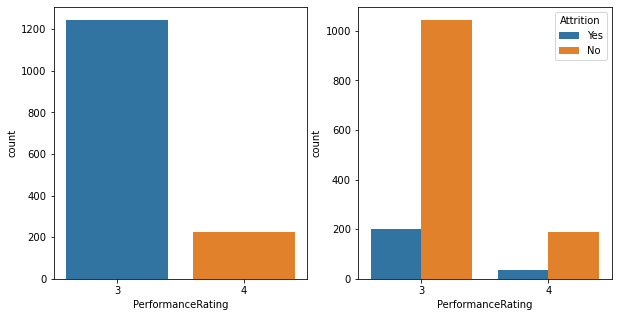

In [72]:
# impact of performance rating to the overall attrition rate
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
ax = sns.countplot(x= "PerformanceRating", data=df_Ibm_data, ax=ax1)
ax = sns.countplot(x= "PerformanceRating", hue = "Attrition", data=df_Ibm_data, ax=ax2)
PerformanceRating = df_Ibm_data.groupby("PerformanceRating")["Attrition"]
print(PerformanceRating.value_counts())

### insights:
This feature as two category i.e 3 and 4. 84.63% of employees are in the performance rating of category 3 and 15.375 in category 4 of the attrition. category 3 tends to have high attrition than 4.

# Monthly Rate

In [73]:
df_Ibm_data.MonthlyRate.value_counts()

4223     3
9150     3
9096     2
13008    2
12858    2
        ..
17071    1
23213    1
3835     1
25258    1
12287    1
Name: MonthlyRate, Length: 1427, dtype: int64

In [74]:
round(df_Ibm_data.MonthlyRate.value_counts()/df_Ibm_data.shape[0] * 100,2 )

4223     0.20
9150     0.20
9096     0.14
13008    0.14
12858    0.14
         ... 
17071    0.07
23213    0.07
3835     0.07
25258    0.07
12287    0.07
Name: MonthlyRate, Length: 1427, dtype: float64

MonthlyRate  Attrition
2094         No           1
2097         No           1
2104         No           1
2112         No           1
2122         No           1
                         ..
26956        Yes          1
26959        Yes          1
26968        No           1
26997        No           1
26999        Yes          1
Name: Attrition, Length: 1444, dtype: int64


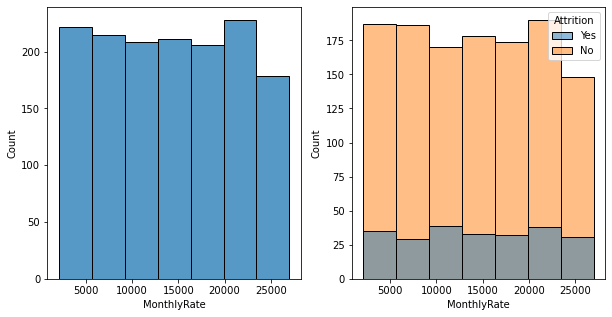

In [75]:
# impact of MonthlyRate to the overall attrition rate
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
ax = sns.histplot(x= "MonthlyRate", data=df_Ibm_data, bins= 7, ax=ax1)
ax = sns.histplot(x= "MonthlyRate", hue = "Attrition", data=df_Ibm_data, bins = 7, ax=ax2)
MonthlyRate = df_Ibm_data.groupby("MonthlyRate")["Attrition"]
print(MonthlyRate.value_counts())

# Distance from Home

In [76]:
df_Ibm_data.DistanceFromHome.value_counts()

2     211
1     208
10     86
9      85
3      84
7      84
8      80
5      65
4      64
6      59
16     32
11     29
24     28
23     27
29     27
18     26
15     26
20     25
25     25
26     25
28     23
19     22
14     21
17     20
12     20
22     19
13     19
21     18
27     12
Name: DistanceFromHome, dtype: int64

In [77]:
round(df_Ibm_data.DistanceFromHome.value_counts()/df_Ibm_data.shape[0] * 100,2 )

2     14.35
1     14.15
10     5.85
9      5.78
3      5.71
7      5.71
8      5.44
5      4.42
4      4.35
6      4.01
16     2.18
11     1.97
24     1.90
23     1.84
29     1.84
18     1.77
15     1.77
20     1.70
25     1.70
26     1.70
28     1.56
19     1.50
14     1.43
17     1.36
12     1.36
22     1.29
13     1.29
21     1.22
27     0.82
Name: DistanceFromHome, dtype: float64

DistanceFromHome  Attrition
1                 No           182
                  Yes           26
2                 No           183
                  Yes           28
3                 No            70
                  Yes           14
4                 No            55
                  Yes            9
5                 No            55
                  Yes           10
6                 No            52
                  Yes            7
7                 No            73
                  Yes           11
8                 No            70
                  Yes           10
9                 No            67
                  Yes           18
10                No            75
                  Yes           11
11                No            25
                  Yes            4
12                No            14
                  Yes            6
13                No            13
                  Yes            6
14                No            17
                  Yes      

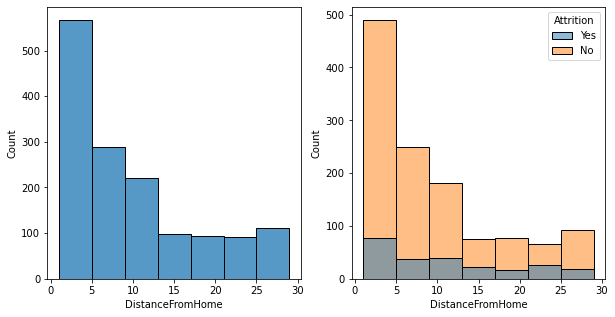

In [78]:
# impact of DistanceFromHome to the overall attrition rate
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
ax = sns.histplot(x= "DistanceFromHome", data=df_Ibm_data,  bins= 7, ax=ax1)
ax = sns.histplot(x= "DistanceFromHome", hue = "Attrition", data=df_Ibm_data, bins =7, ax=ax2)
DistanceFromHome = df_Ibm_data.groupby("DistanceFromHome")["Attrition"]
print(DistanceFromHome.value_counts())

### insights;
As the distance between company and employees home increases, the attrition percentage increases.

# Number of Companies worked

In [79]:
df_Ibm_data.NumCompaniesWorked.value_counts()

1    521
0    197
3    159
2    146
4    139
7     74
6     70
5     63
9     52
8     49
Name: NumCompaniesWorked, dtype: int64

In [80]:
round(df_Ibm_data.NumCompaniesWorked.value_counts()/df_Ibm_data.shape[0] * 100,2 )

1    35.44
0    13.40
3    10.82
2     9.93
4     9.46
7     5.03
6     4.76
5     4.29
9     3.54
8     3.33
Name: NumCompaniesWorked, dtype: float64

NumCompaniesWorked  Attrition
0                   No           174
                    Yes           23
1                   No           423
                    Yes           98
2                   No           130
                    Yes           16
3                   No           143
                    Yes           16
4                   No           122
                    Yes           17
5                   No            47
                    Yes           16
6                   No            54
                    Yes           16
7                   No            57
                    Yes           17
8                   No            43
                    Yes            6
9                   No            40
                    Yes           12
Name: Attrition, dtype: int64


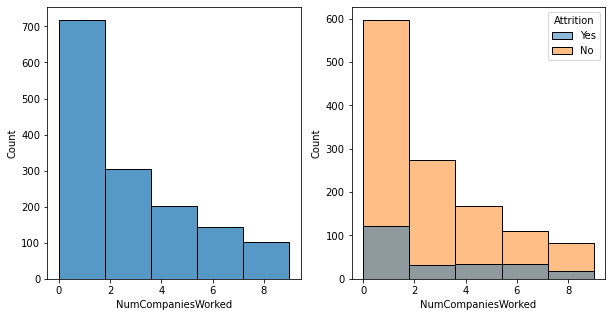

In [81]:
# impact of NumCompaniesWorked to the overall attrition rate
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
ax = sns.histplot(x= "NumCompaniesWorked", data=df_Ibm_data, bins = 5, ax=ax1)
ax = sns.histplot(x= "NumCompaniesWorked", hue = "Attrition", data=df_Ibm_data, bins = 5, ax=ax2)
NumCompaniesWorked = df_Ibm_data.groupby("NumCompaniesWorked")["Attrition"]
print(NumCompaniesWorked.value_counts())

### insights;
most employees with 0-2 years company experience before current company are more likely to leave the company. the have the highest attrition number. The employees without previous experience are second most attrited number.

# Relationship satisfaction

In [82]:
df_Ibm_data.RelationshipSatisfaction.value_counts()

3    459
4    432
2    303
1    276
Name: RelationshipSatisfaction, dtype: int64

In [83]:
round(df_Ibm_data.RelationshipSatisfaction.value_counts()/df_Ibm_data.shape[0] * 100,2 )

3    31.22
4    29.39
2    20.61
1    18.78
Name: RelationshipSatisfaction, dtype: float64

RelationshipSatisfaction  Attrition
1                         No           219
                          Yes           57
2                         No           258
                          Yes           45
3                         No           388
                          Yes           71
4                         No           368
                          Yes           64
Name: Attrition, dtype: int64


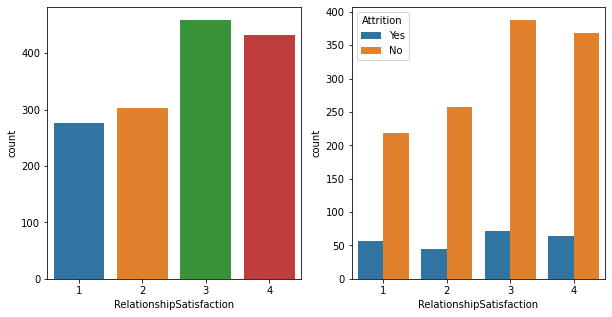

In [84]:
# impact of relationship satisfaction on attrition rate
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
ax = sns.countplot(x= "RelationshipSatisfaction", data=df_Ibm_data, ax=ax1)
ax = sns.countplot(x= "RelationshipSatisfaction", hue = "Attrition", data=df_Ibm_data, ax=ax2)
RelationshipSatisfaction = df_Ibm_data.groupby("RelationshipSatisfaction")["Attrition"]
print(RelationshipSatisfaction.value_counts())

### insights;
High and very high relationship satisfaction level have the most attrition number resp.
the highest attrition percentage in the satisfaction group is low as it might be expected.

# Marital Status

In [85]:
df_Ibm_data.MaritalStatus.value_counts()

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

In [86]:
round(df_Ibm_data.MaritalStatus.value_counts()/df_Ibm_data.shape[0] * 100,2 )

Married     45.78
Single      31.97
Divorced    22.24
Name: MaritalStatus, dtype: float64

MaritalStatus  Attrition
Divorced       No           294
               Yes           33
Married        No           589
               Yes           84
Single         No           350
               Yes          120
Name: Attrition, dtype: int64


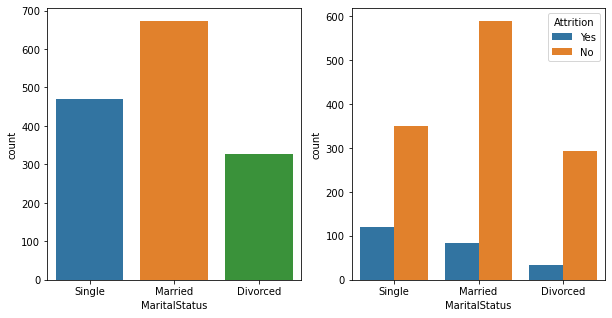

In [87]:
# impact of MaritalStatus on attrition rate
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
ax = sns.countplot(x= "MaritalStatus", data=df_Ibm_data, ax=ax1)
ax = sns.countplot(x= "MaritalStatus", hue = "Attrition", data=df_Ibm_data, ax=ax2)
MaritalStatus = df_Ibm_data.groupby("MaritalStatus")["Attrition"]
print(MaritalStatus.value_counts())

### insights;
single employees are likely to leave the company as they have the highest attrition number. Married and Divorced are also at attrition risk in the company.


# Percent salary hike

In [88]:
df_Ibm_data.PercentSalaryHike.value_counts()

11    210
13    209
14    201
12    198
15    101
18     89
17     82
16     78
19     76
22     56
20     55
21     48
23     28
24     21
25     18
Name: PercentSalaryHike, dtype: int64

In [89]:
round(df_Ibm_data.PercentSalaryHike.value_counts()/df_Ibm_data.shape[0] * 100,2 )

11    14.29
13    14.22
14    13.67
12    13.47
15     6.87
18     6.05
17     5.58
16     5.31
19     5.17
22     3.81
20     3.74
21     3.27
23     1.90
24     1.43
25     1.22
Name: PercentSalaryHike, dtype: float64

PercentSalaryHike  Attrition
11                 No           169
                   Yes           41
12                 No           165
                   Yes           33
13                 No           175
                   Yes           34
14                 No           177
                   Yes           24
15                 No            83
                   Yes           18
16                 No            64
                   Yes           14
17                 No            68
                   Yes           14
18                 No            76
                   Yes           13
19                 No            67
                   Yes            9
20                 No            48
                   Yes            7
21                 No            43
                   Yes            5
22                 No            44
                   Yes           12
23                 No            22
                   Yes            6
24                 No            15

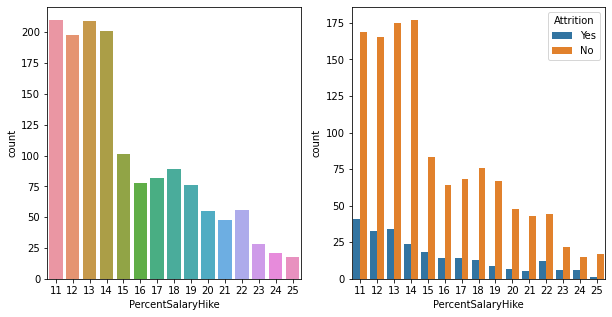

In [90]:
# impact of PercentSalaryHike on attrition rate
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
ax = sns.countplot(x= "PercentSalaryHike", data=df_Ibm_data, ax=ax1)
ax = sns.countplot(x= "PercentSalaryHike", hue = "Attrition", data=df_Ibm_data, ax=ax2)
PercentSalaryHike = df_Ibm_data.groupby("PercentSalaryHike")["Attrition"]
print(PercentSalaryHike.value_counts())

### insights;
as expected employees with high percent salary hike are willingly to stay in the company.

# Overtime

In [91]:
df_Ibm_data.OverTime.value_counts()

No     1054
Yes     416
Name: OverTime, dtype: int64

In [92]:
round(df_Ibm_data.OverTime.value_counts()/df_Ibm_data.shape[0] * 100,2 )

No     71.7
Yes    28.3
Name: OverTime, dtype: float64

OverTime  Attrition
No        No           944
          Yes          110
Yes       No           289
          Yes          127
Name: Attrition, dtype: int64


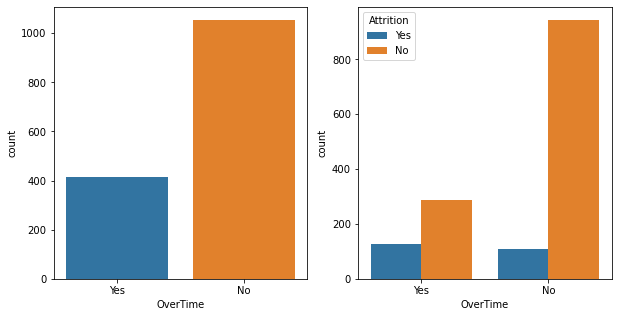

In [93]:
# impact of OverTime on attrition rate
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
ax = sns.countplot(x= "OverTime", data=df_Ibm_data, ax=ax1)
ax = sns.countplot(x= "OverTime", hue = "Attrition", data=df_Ibm_data, ax=ax2)
OverTime = df_Ibm_data.groupby("OverTime")["Attrition"]
print(OverTime.value_counts())

### insights;
there is no significant difference between the target variables because both variales are likely to leave the company

# Stock option level

In [94]:
df_Ibm_data.StockOptionLevel.value_counts()

0    631
1    596
2    158
3     85
Name: StockOptionLevel, dtype: int64

In [95]:
round(df_Ibm_data.StockOptionLevel.value_counts()/df_Ibm_data.shape[0] * 100,2 )

0    42.93
1    40.54
2    10.75
3     5.78
Name: StockOptionLevel, dtype: float64

StockOptionLevel  Attrition
0                 No           477
                  Yes          154
1                 No           540
                  Yes           56
2                 No           146
                  Yes           12
3                 No            70
                  Yes           15
Name: Attrition, dtype: int64


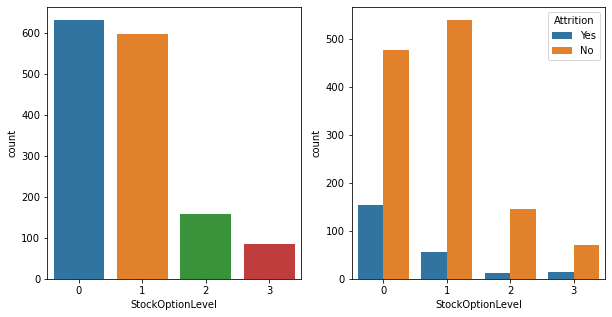

In [96]:
# impact of Rlationship satisfaction rate
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
ax = sns.countplot(x= "StockOptionLevel", data=df_Ibm_data, ax=ax1)
ax = sns.countplot(x= "StockOptionLevel", hue = "Attrition", data=df_Ibm_data, ax=ax2)
StockOptionLevel = df_Ibm_data.groupby("StockOptionLevel")["Attrition"]
print(StockOptionLevel.value_counts())

### insights;
stock option level(0) has the highest attrition rate compared to other categories although as the stock option level increases attrition decrease in number.

# Total working years

In [97]:
df_Ibm_data.TotalWorkingYears.value_counts()

10    202
6     125
8     103
9      96
5      88
7      81
1      81
4      63
12     48
3      42
15     40
16     37
13     36
11     36
21     34
17     33
14     31
2      31
20     30
18     27
19     22
23     22
22     21
24     18
28     14
25     14
26     14
0      11
29     10
31      9
32      9
27      7
30      7
33      7
36      6
34      5
37      4
35      3
40      2
38      1
Name: TotalWorkingYears, dtype: int64

In [98]:
round(df_Ibm_data.TotalWorkingYears.value_counts()/df_Ibm_data.shape[0] * 100,2 )

10    13.74
6      8.50
8      7.01
9      6.53
5      5.99
7      5.51
1      5.51
4      4.29
12     3.27
3      2.86
15     2.72
16     2.52
13     2.45
11     2.45
21     2.31
17     2.24
14     2.11
2      2.11
20     2.04
18     1.84
19     1.50
23     1.50
22     1.43
24     1.22
28     0.95
25     0.95
26     0.95
0      0.75
29     0.68
31     0.61
32     0.61
27     0.48
30     0.48
33     0.48
36     0.41
34     0.34
37     0.27
35     0.20
40     0.14
38     0.07
Name: TotalWorkingYears, dtype: float64

TotalWorkingYears  Attrition
0                  No            6
                   Yes           5
1                  No           41
                   Yes          40
2                  No           22
                                ..
35                 No            3
36                 No            6
37                 No            4
38                 No            1
40                 Yes           2
Name: Attrition, Length: 71, dtype: int64


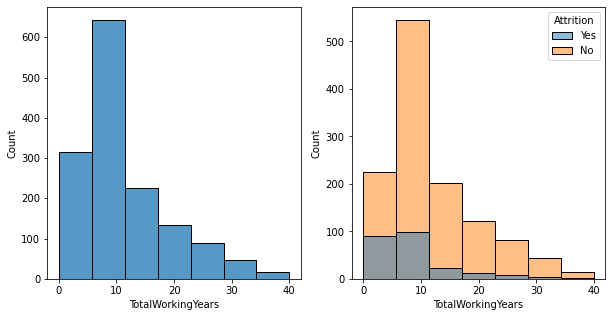

In [99]:
# impact of TotalWorkingYears on attrition rate
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
ax = sns.histplot(x= "TotalWorkingYears", data=df_Ibm_data, bins = 7, ax=ax1)
ax = sns.histplot(x= "TotalWorkingYears", hue = "Attrition", data=df_Ibm_data, bins = 7, ax=ax2)
TotalWorkingYears = df_Ibm_data.groupby("TotalWorkingYears")["Attrition"]
print(TotalWorkingYears.value_counts())

### insights;
employees who have 0-10 years working experience are more likely to leave the company as those with more working experience stay.

# Training times last year

In [100]:
df_Ibm_data.TrainingTimesLastYear.value_counts()

2    547
3    491
4    123
5    119
1     71
6     65
0     54
Name: TrainingTimesLastYear, dtype: int64

In [101]:
round(df_Ibm_data.TrainingTimesLastYear.value_counts()/df_Ibm_data.shape[0] * 100,2 )

2    37.21
3    33.40
4     8.37
5     8.10
1     4.83
6     4.42
0     3.67
Name: TrainingTimesLastYear, dtype: float64

TrainingTimesLastYear  Attrition
0                      No            39
                       Yes           15
1                      No            62
                       Yes            9
2                      No           449
                       Yes           98
3                      No           422
                       Yes           69
4                      No            97
                       Yes           26
5                      No           105
                       Yes           14
6                      No            59
                       Yes            6
Name: Attrition, dtype: int64


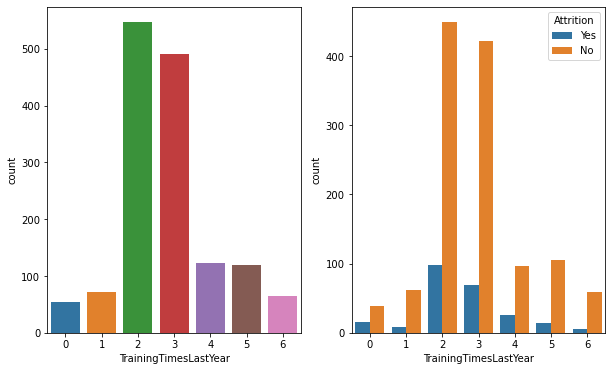

In [102]:
# impact of Rlationship satisfaction rate
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,6))
ax = sns.countplot(x= "TrainingTimesLastYear", data=df_Ibm_data, ax=ax1)
ax = sns.countplot(x= "TrainingTimesLastYear", hue = "Attrition", data=df_Ibm_data, ax=ax2)
TrainingTimesLastYear = df_Ibm_data.groupby("TrainingTimesLastYear")["Attrition"]
print(TrainingTimesLastYear.value_counts())

### insights;
employees who do not have training before hand has the highest attrition number in its individual group

# Years at company

In [103]:
df_Ibm_data.YearsAtCompany.value_counts()

5     196
1     171
3     128
2     127
10    120
4     110
7      90
9      82
8      80
6      76
0      44
11     32
20     27
13     24
15     20
14     18
22     15
12     14
21     14
18     13
16     12
19     11
17      9
24      6
33      5
25      4
26      4
31      3
32      3
36      2
29      2
27      2
23      2
30      1
34      1
37      1
40      1
Name: YearsAtCompany, dtype: int64

In [104]:
round(df_Ibm_data.YearsAtCompany.value_counts()/df_Ibm_data.shape[0] * 100,2 )

5     13.33
1     11.63
3      8.71
2      8.64
10     8.16
4      7.48
7      6.12
9      5.58
8      5.44
6      5.17
0      2.99
11     2.18
20     1.84
13     1.63
15     1.36
14     1.22
22     1.02
12     0.95
21     0.95
18     0.88
16     0.82
19     0.75
17     0.61
24     0.41
33     0.34
25     0.27
26     0.27
31     0.20
32     0.20
36     0.14
29     0.14
27     0.14
23     0.14
30     0.07
34     0.07
37     0.07
40     0.07
Name: YearsAtCompany, dtype: float64

YearsAtCompany  Attrition
0               No            28
                Yes           16
1               No           112
                Yes           59
2               No           100
                            ... 
33              Yes            1
34              No             1
36              No             2
37              No             1
40              Yes            1
Name: Attrition, Length: 64, dtype: int64


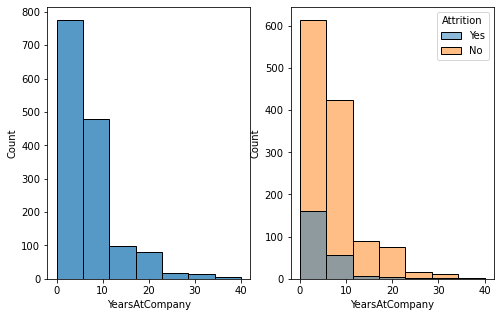

In [105]:
# impact of YearsAtCompany on attrition rate
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(8,5))
ax = sns.histplot(x= "YearsAtCompany", data=df_Ibm_data, bins = 7, ax=ax1)
ax = sns.histplot(x= "YearsAtCompany", hue = "Attrition", data=df_Ibm_data, bins = 7, ax=ax2)
YearsAtCompany = df_Ibm_data.groupby("YearsAtCompany")["Attrition"]
print(YearsAtCompany.value_counts())

### insights;
employees with one year or less working experience has the highest attrition percentage besides, attrition rate is higher for those with working experience less than 10years.

# Years in current role

In [106]:
df_Ibm_data.YearsInCurrentRole.value_counts()

2     372
0     244
7     222
3     135
4     104
8      89
9      67
1      57
6      37
5      36
10     29
11     22
13     14
14     11
12     10
15      8
16      7
17      4
18      2
Name: YearsInCurrentRole, dtype: int64

In [107]:
round(df_Ibm_data.YearsInCurrentRole.value_counts()/df_Ibm_data.shape[0] * 100,2 )

2     25.31
0     16.60
7     15.10
3      9.18
4      7.07
8      6.05
9      4.56
1      3.88
6      2.52
5      2.45
10     1.97
11     1.50
13     0.95
14     0.75
12     0.68
15     0.54
16     0.48
17     0.27
18     0.14
Name: YearsInCurrentRole, dtype: float64

YearsInCurrentRole  Attrition
0                   No           171
                    Yes           73
1                   No            46
                    Yes           11
2                   No           304
                    Yes           68
3                   No           119
                    Yes           16
4                   No            89
                    Yes           15
5                   No            35
                    Yes            1
6                   No            35
                    Yes            2
7                   No           191
                    Yes           31
8                   No            82
                    Yes            7
9                   No            61
                    Yes            6
10                  No            27
                    Yes            2
11                  No            22
12                  No             9
                    Yes            1
13                  No            13
        

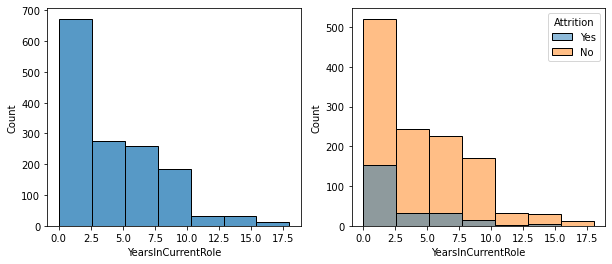

In [108]:
# impact of TrainingTimesLastYear on attrition rate
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4))
ax = sns.histplot(x= "YearsInCurrentRole", data=df_Ibm_data, bins = 7, ax=ax1)
ax = sns.histplot(x= "YearsInCurrentRole", hue = "Attrition", data=df_Ibm_data, bins = 7, ax=ax2)
YearsInCurrentRole = df_Ibm_data.groupby("YearsInCurrentRole")["Attrition"]
print(YearsInCurrentRole.value_counts())

### insights;
employees in their first year tend to leave may be due to challenges or not satisfied in the current role while those from 7years and above probably leave as a result of looking for better opportunities

# Correlation

In [109]:
# mapping
# encoding objects columns to integers
df_Ibm_data["Attrition"] = np.where(df_Ibm_data["Attrition"] == "Yes",1,0)
df_Ibm_data.head()


,id,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,2,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,3,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,4,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,5,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [110]:
# mapping
# encoding objects columns to integers
df_Ibm_data["OverTime"] = np.where(df_Ibm_data["OverTime"] == "Yes",1,0)
df_Ibm_data.head()


,id,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,1,11,3,1,80,0,8,0,1,6,4,0,5
1,2,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,0,23,4,4,80,1,10,3,3,10,7,1,7
2,3,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,1,15,3,2,80,0,7,3,3,0,0,0,0
3,4,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,1,11,3,3,80,0,8,3,3,8,7,3,0
4,5,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,0,12,3,4,80,1,6,3,3,2,2,2,2


In [111]:
#dropping some columns that might not have influence to employees attrition
columns = ["id","EmployeeCount", "StandardHours"]
df_Ibm_data.drop(columns, inplace = True, axis=1)
df_Ibm_data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

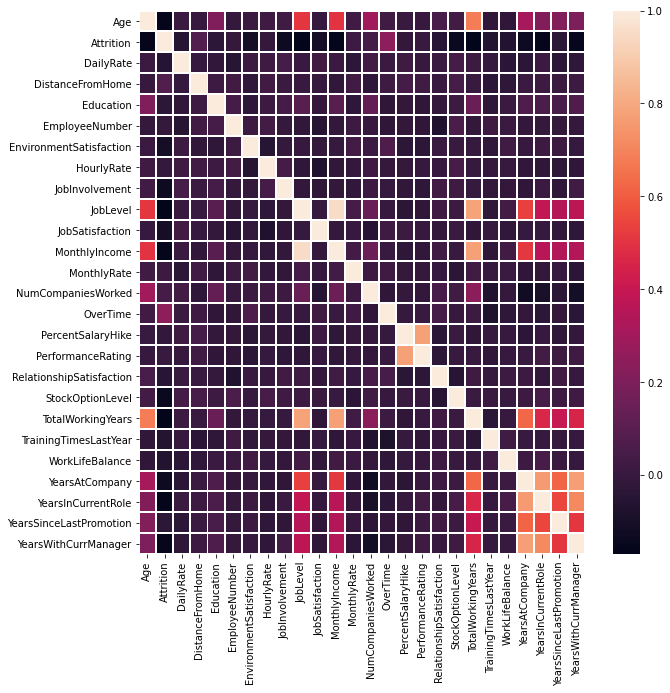

In [112]:
# corr = df_Ibm_data.corr()
# plt.figure(figsize = (10,10))
# sns.heatmap(df_Ibm_data.corr(), fmt='.2ft', cmap ='magma', linewidth = 1)
# plt.title('Correlation Heatmap', fontsize = 20)
# plt.show()
  
corr = df_Ibm_data.corr()
plt.figure(figsize = (10,10))
sns.heatmap(corr, linewidth = 1);



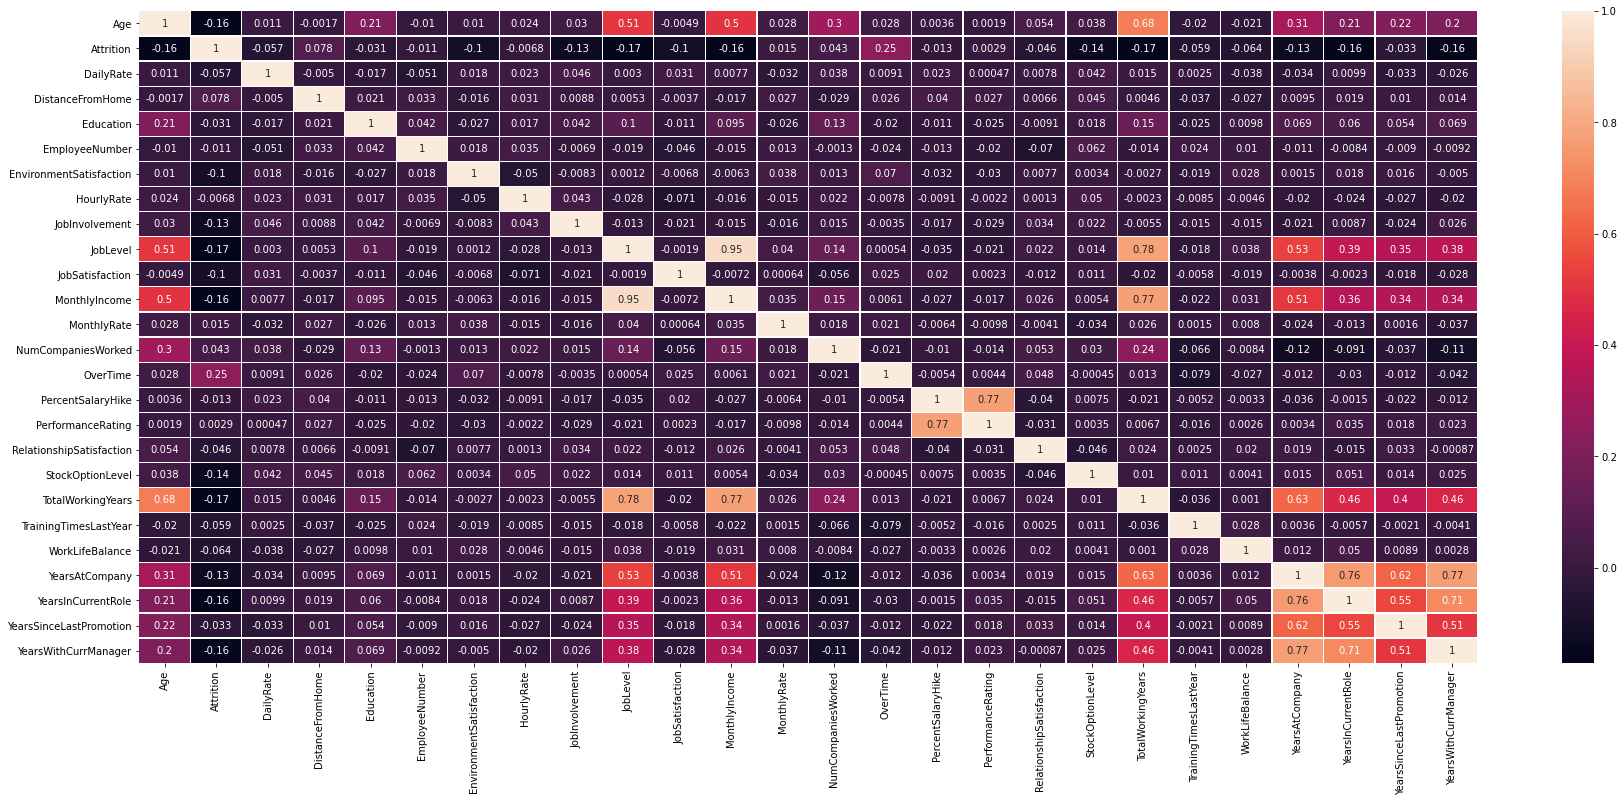

In [113]:
corr = df_Ibm_data.corr()
det = np.array(df_Ibm_data)
det[np.tril_indices_from(det)] = False
fig=plt.gcf()
fig.set_size_inches(30,12)
sns.heatmap(df_Ibm_data.corr(), annot=True, cbar=True, linewidth = 0.2);
#sns.heatmap(df_Ibm_data.corr(), fmt='.2ft', cmap ='magma', linewidth = 1)

### insights
1) Distance from home, Monthly rate, Number of companies worked, OverTime and Performance Rating are the features with highest positive corelated to Attrition.
2) Age, Job level, Monthly income and Years at company has medium correlation to total working years in overall. 

2) other variable seems to be less correlated

# what do you think are the 3 factors behind employee attrition

From the heatmap; 
Overtime, Distance from home and Number of companies are possible factors behind employee attrition when compared in relation to attrition.

# 2) what is the relationship between education and monthly income

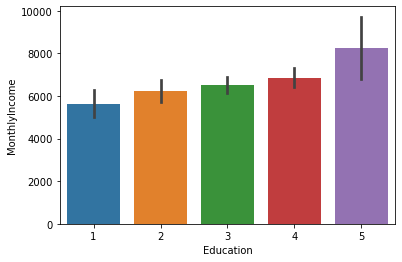

In [114]:
sns.barplot(data = df_Ibm_data, x = "Education", y = "MonthlyIncome");

### insights;
it can be deduced that those with higher education level(5) tend to earn higher than other educational level.

## 3) what is the effect of age on attrition?


In [115]:
df_Ibm_data.Age.sum()

54278

In [116]:
df_Ibm_data[['Age', 'Attrition',]].groupby(["Attrition"]).describe()

Age                                                  
            count       mean      std   min   25%   50%   75%   max
Attrition                                                          
0          1233.0  37.561233  8.88836  18.0  31.0  36.0  43.0  60.0
1           237.0  33.607595  9.68935  18.0  28.0  32.0  39.0  58.0

Age  Attrition
18   0             4
     1             4
19   1             6
     0             3
20   1             6
                  ..
57   0             4
58   0             9
     1             5
59   0            10
60   0             5
Name: Attrition, Length: 82, dtype: int64


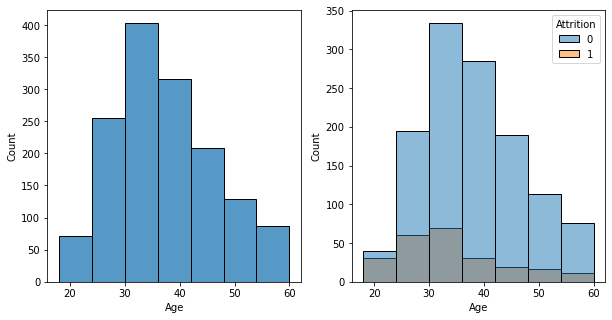

In [117]:
# impact of Age to the overall attrition rate
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
ax = sns.histplot(x= "Age", data=df_Ibm_data, bins = 7, ax=ax1)
ax = sns.histplot(x= "Age", hue = "Attrition", data=df_Ibm_data, bins = 7, ax=ax2)
Age = df_Ibm_data.groupby("Age")["Attrition"]
print(Age.value_counts())

### insights;
1)the median age of employee's in the IBM is between 30 - 40years. 
2)the minimum age of employee'sin the IBM is 18years
3)the maximum age is 60years.
From the plot, majority of people who left the company are between the ages of 25 and 35 years while those with higher ages had insignificant attrition i.e less tendency to leave the company since they have settled in the company.

## 4) is income the main factor in employee attrition?

In [118]:
df_Ibm_data[['MonthlyIncome', 'Attrition',]].groupby(["Attrition"]).describe()

MonthlyIncome                                                    \
                  count         mean          std     min     25%     50%   
Attrition                                                                   
0                1233.0  6832.739659  4818.208001  1051.0  3211.0  5204.0   
1                 237.0  4787.092827  3640.210367  1009.0  2373.0  3202.0   

                            
              75%      max  
Attrition                   
0          8834.0  19999.0  
1          5916.0  19859.0

MonthlyIncome  Attrition
1009           1            1
1051           0            1
1052           0            1
1081           1            1
1091           1            1
                           ..
19859          1            1
19926          0            1
19943          0            1
19973          0            1
19999          0            1
Name: Attrition, Length: 1388, dtype: int64


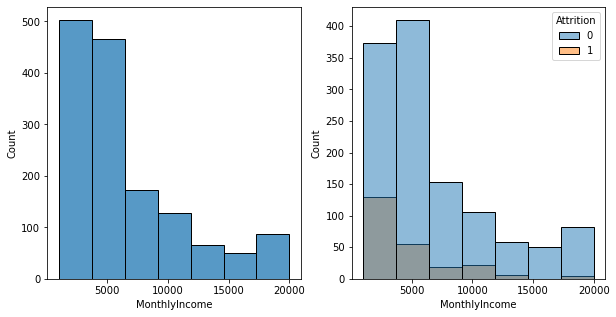

In [119]:
# impact of MonthlyIncome to the overall attrition rate
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
ax = sns.histplot(x= "MonthlyIncome", data=df_Ibm_data, bins = 7, ax=ax1)
ax = sns.histplot(x= "MonthlyIncome", hue = "Attrition", data=df_Ibm_data, bins = 7, ax=ax2)
MonthlyIncome = df_Ibm_data.groupby("MonthlyIncome")["Attrition"]
print(MonthlyIncome.value_counts())

insights:

from the of monthly income it can be seen that people with low monthly income have a higher probability of attrition especially when the monthly income is very low. from the plot it is seen that those with Monthly income greater than 5000 employees tends not leave the company.
As the monthly income increase, it is observed that there is decrease in attrition.
From this Monthly income cannot be deduced to be a main factor.

# 5) how does work-life balance impact the overall attrition rate

In [120]:
df_Ibm_data.WorkLifeBalance.value_counts()

3    893
2    344
4    153
1     80
Name: WorkLifeBalance, dtype: int64

In [121]:
round(df_Ibm_data.RelationshipSatisfaction.value_counts()/df_Ibm_data.shape[0] * 100,2 )

3    31.22
4    29.39
2    20.61
1    18.78
Name: RelationshipSatisfaction, dtype: float64

In [122]:
df_Ibm_data[['WorkLifeBalance', 'Attrition',]].groupby(["Attrition"]).describe()

WorkLifeBalance                                             
                    count      mean       std  min  25%  50%  75%  max
Attrition                                                             
0                  1233.0  2.781022  0.681907  1.0  2.0  3.0  3.0  4.0
1                   237.0  2.658228  0.816453  1.0  2.0  3.0  3.0  4.0

WorkLifeBalance  Attrition
1                0             55
                 1             25
2                0            286
                 1             58
3                0            766
                 1            127
4                0            126
                 1             27
Name: Attrition, dtype: int64


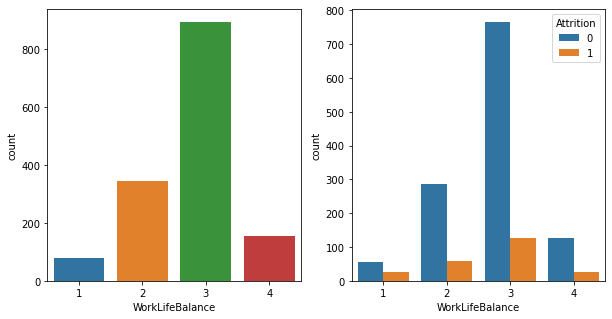

In [123]:
# impact of work-life balance to the overall attrition rate
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
ax = sns.countplot(x= "WorkLifeBalance", data=df_Ibm_data, ax=ax1)
ax = sns.countplot(x= "WorkLifeBalance", hue = "Attrition", data=df_Ibm_data, ax=ax2)
WorkLifeBalance = df_Ibm_data.groupby("WorkLifeBalance")["Attrition"]
print(WorkLifeBalance.value_counts())

### insights;
work life balance generally in the company seems to be very good although bad work life balance(1) has the highest attrition within its individual group

1) most employees have above average(60.75%)work life balance(3)  while very few employees(5%) practice poor work life balance(1).
2) from the plot we can deduce that most employees with good work life balance(3,2,4) do not leave the company while those in 1(probably the entry-level role)work life balance tends to leave the company